Effect of λ (lamda) on PPO Performance Metrics


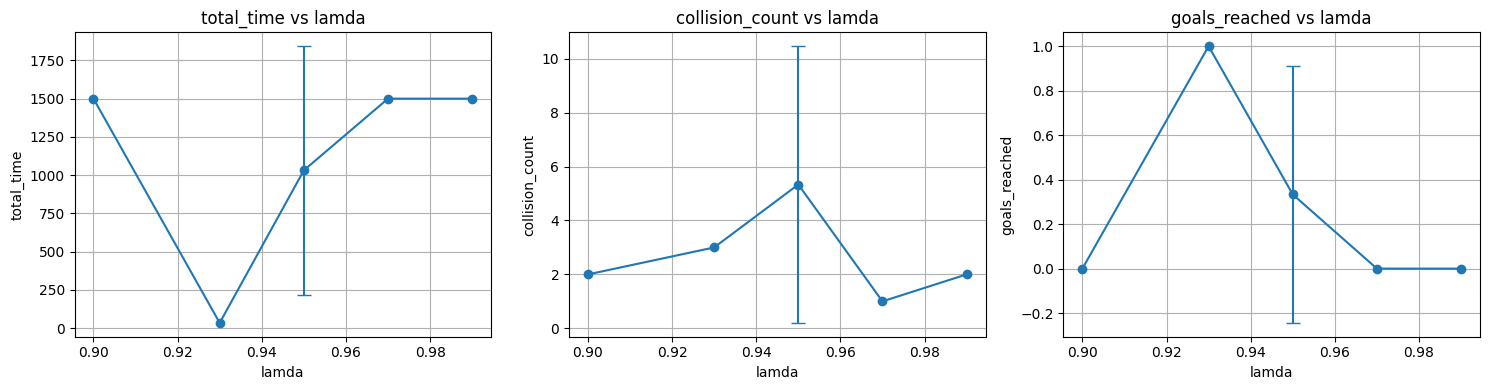

total_time             collision_count           goals_reached  \
              mean         std            mean       std          mean   
lamda                                                                    
0.90   1500.000000         NaN        2.000000       NaN      0.000000   
0.93     34.000000         NaN        3.000000       NaN      1.000000   
0.95   1031.333333  811.754478        5.333333  5.131601      0.333333   
0.97   1500.000000         NaN        1.000000       NaN      0.000000   
0.99   1500.000000         NaN        2.000000       NaN      0.000000   

                
           std  
lamda           
0.90       NaN  
0.93       NaN  
0.95   0.57735  
0.97       NaN  
0.99       NaN

Effect of clip_eps on PPO Performance Metrics


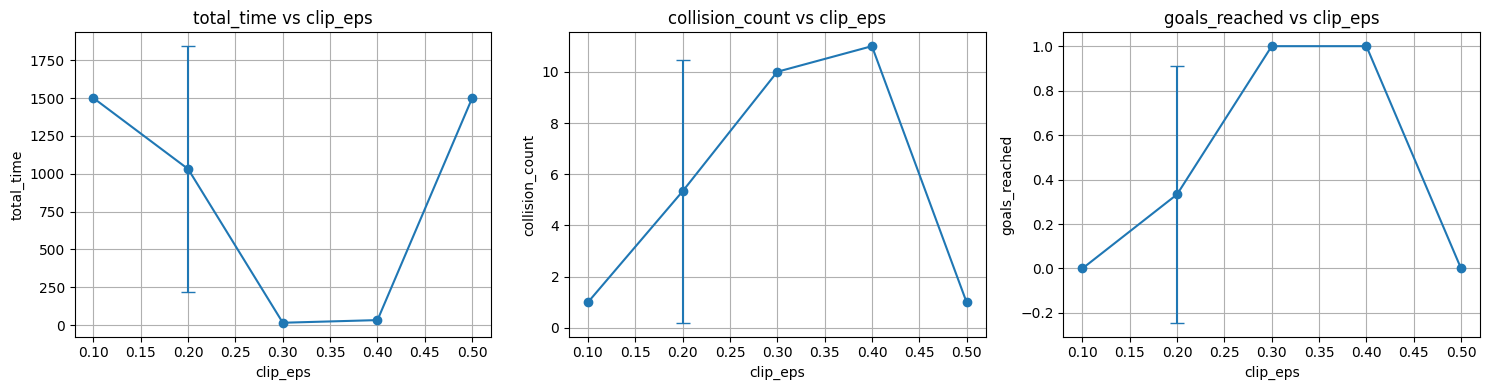

total_time             collision_count           goals_reached  \
                 mean         std            mean       std          mean   
clip_eps                                                                    
0.1       1500.000000         NaN        1.000000       NaN      0.000000   
0.2       1031.333333  811.754478        5.333333  5.131601      0.333333   
0.3         16.000000         NaN       10.000000       NaN      1.000000   
0.4         33.500000         NaN       11.000000       NaN      1.000000   
0.5       1500.000000         NaN        1.000000       NaN      0.000000   

                   
              std  
clip_eps           
0.1           NaN  
0.2       0.57735  
0.3           NaN  
0.4           NaN  
0.5           NaN

Effect of entropy_coeff on PPO Performance Metrics


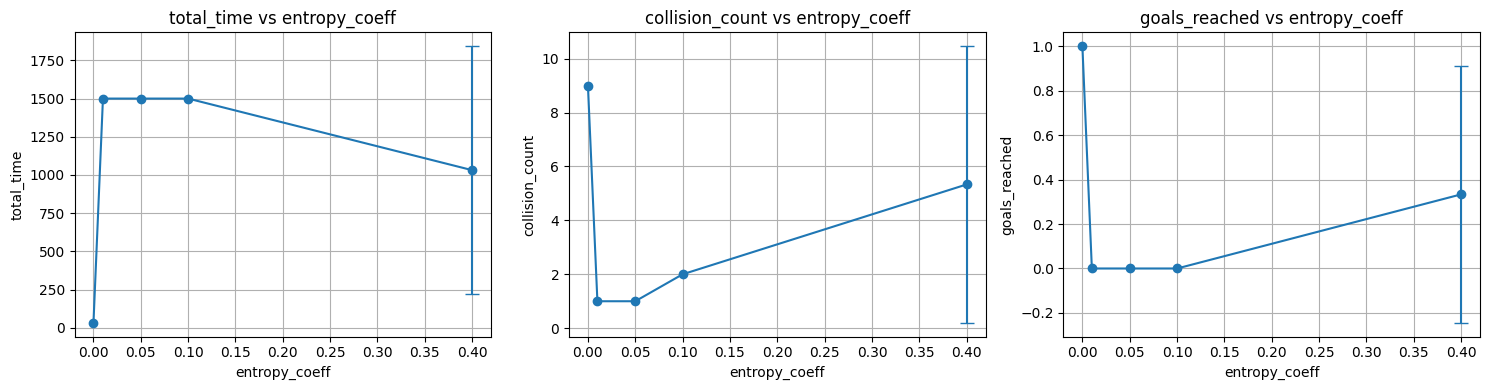

total_time             collision_count            \
                      mean         std            mean       std   
entropy_coeff                                                      
0.00             32.500000         NaN        9.000000       NaN   
0.01           1500.000000         NaN        1.000000       NaN   
0.05           1500.000000         NaN        1.000000       NaN   
0.10           1500.000000         NaN        2.000000       NaN   
0.40           1031.333333  811.754478        5.333333  5.131601   

              goals_reached           
                       mean      std  
entropy_coeff                         
0.00               1.000000      NaN  
0.01               0.000000      NaN  
0.05               0.000000      NaN  
0.10               0.000000      NaN  
0.40               0.333333  0.57735

Effect of ppo_epochs on PPO Performance Metrics


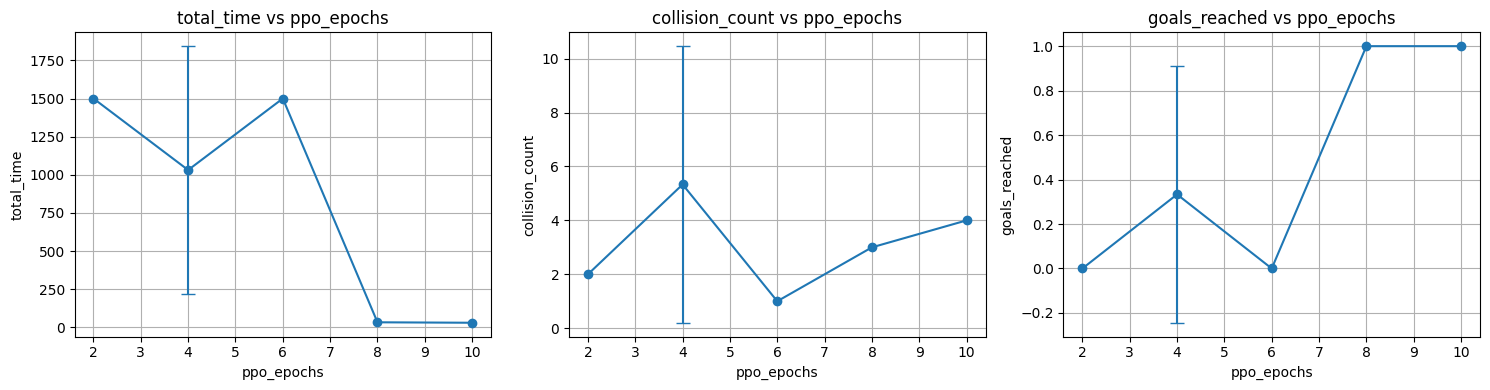

total_time             collision_count           goals_reached  \
                   mean         std            mean       std          mean   
ppo_epochs                                                                    
2           1500.000000         NaN        2.000000       NaN      0.000000   
4           1031.333333  811.754478        5.333333  5.131601      0.333333   
6           1500.000000         NaN        1.000000       NaN      0.000000   
8             33.500000         NaN        3.000000       NaN      1.000000   
10            30.500000         NaN        4.000000       NaN      1.000000   

                     
                std  
ppo_epochs           
2               NaN  
4           0.57735  
6               NaN  
8               NaN  
10              NaN

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = '/Users/sohamkakra/Documents/GitHub/DataChallangeGroup14_Assignment2/combined_results_full.xlsx'
part3_df = pd.read_excel(file_path, sheet_name='Part3')

# Default values for reference (update if your experiment uses different ones)
default_vals = {
    'lamda': 0.95,
    'clip_eps': 0.2,
    'entropy_coeff': 0.4,
    'ppo_epochs': 4
}

# Helper function for plotting
def plot_hyperparam_effect(df, param, param_vals, metrics, default_vals):
    # Filter: Only keep rows where all other params are at default value
    filter_cond = np.ones(len(df), dtype=bool)
    for k, v in default_vals.items():
        if k != param:
            filter_cond &= (df[k] == v)
    filtered = df[filter_cond]

    # Aggregate by param value
    summary = filtered.groupby(param)[metrics].agg(['mean', 'std'])

    # Plotting
    fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 4))
    if len(metrics) == 1:
        axes = [axes]
    for ax, metric in zip(axes, metrics):
        ax.errorbar(summary.index, summary[(metric, 'mean')], yerr=summary[(metric, 'std')], fmt='-o', capsize=5)
        ax.set_title(f"{metric} vs {param}")
        ax.set_xlabel(param)
        ax.set_ylabel(metric)
        ax.grid(True)
    plt.tight_layout()
    plt.show()

    # Print summary
    display(summary)

# Analysis for each hyperparameter
metrics = ['total_time', 'collision_count', 'goals_reached']

# 1. Lamda (λ)
print("Effect of λ (lamda) on PPO Performance Metrics")
plot_hyperparam_effect(part3_df, 'lamda', [0.90, 0.93, 0.95, 0.97, 0.99], metrics, default_vals)

# 2. clip_eps
print("Effect of clip_eps on PPO Performance Metrics")
plot_hyperparam_effect(part3_df, 'clip_eps', [0.1, 0.2, 0.3, 0.4, 0.5], metrics, default_vals)

# 3. entropy_coeff
print("Effect of entropy_coeff on PPO Performance Metrics")
plot_hyperparam_effect(part3_df, 'entropy_coeff', [0.0, 0.01, 0.05, 0.1, 0.4], metrics, default_vals)

# 4. ppo_epochs
print("Effect of ppo_epochs on PPO Performance Metrics")
plot_hyperparam_effect(part3_df, 'ppo_epochs', [2, 4, 6, 8, 10], metrics, default_vals)

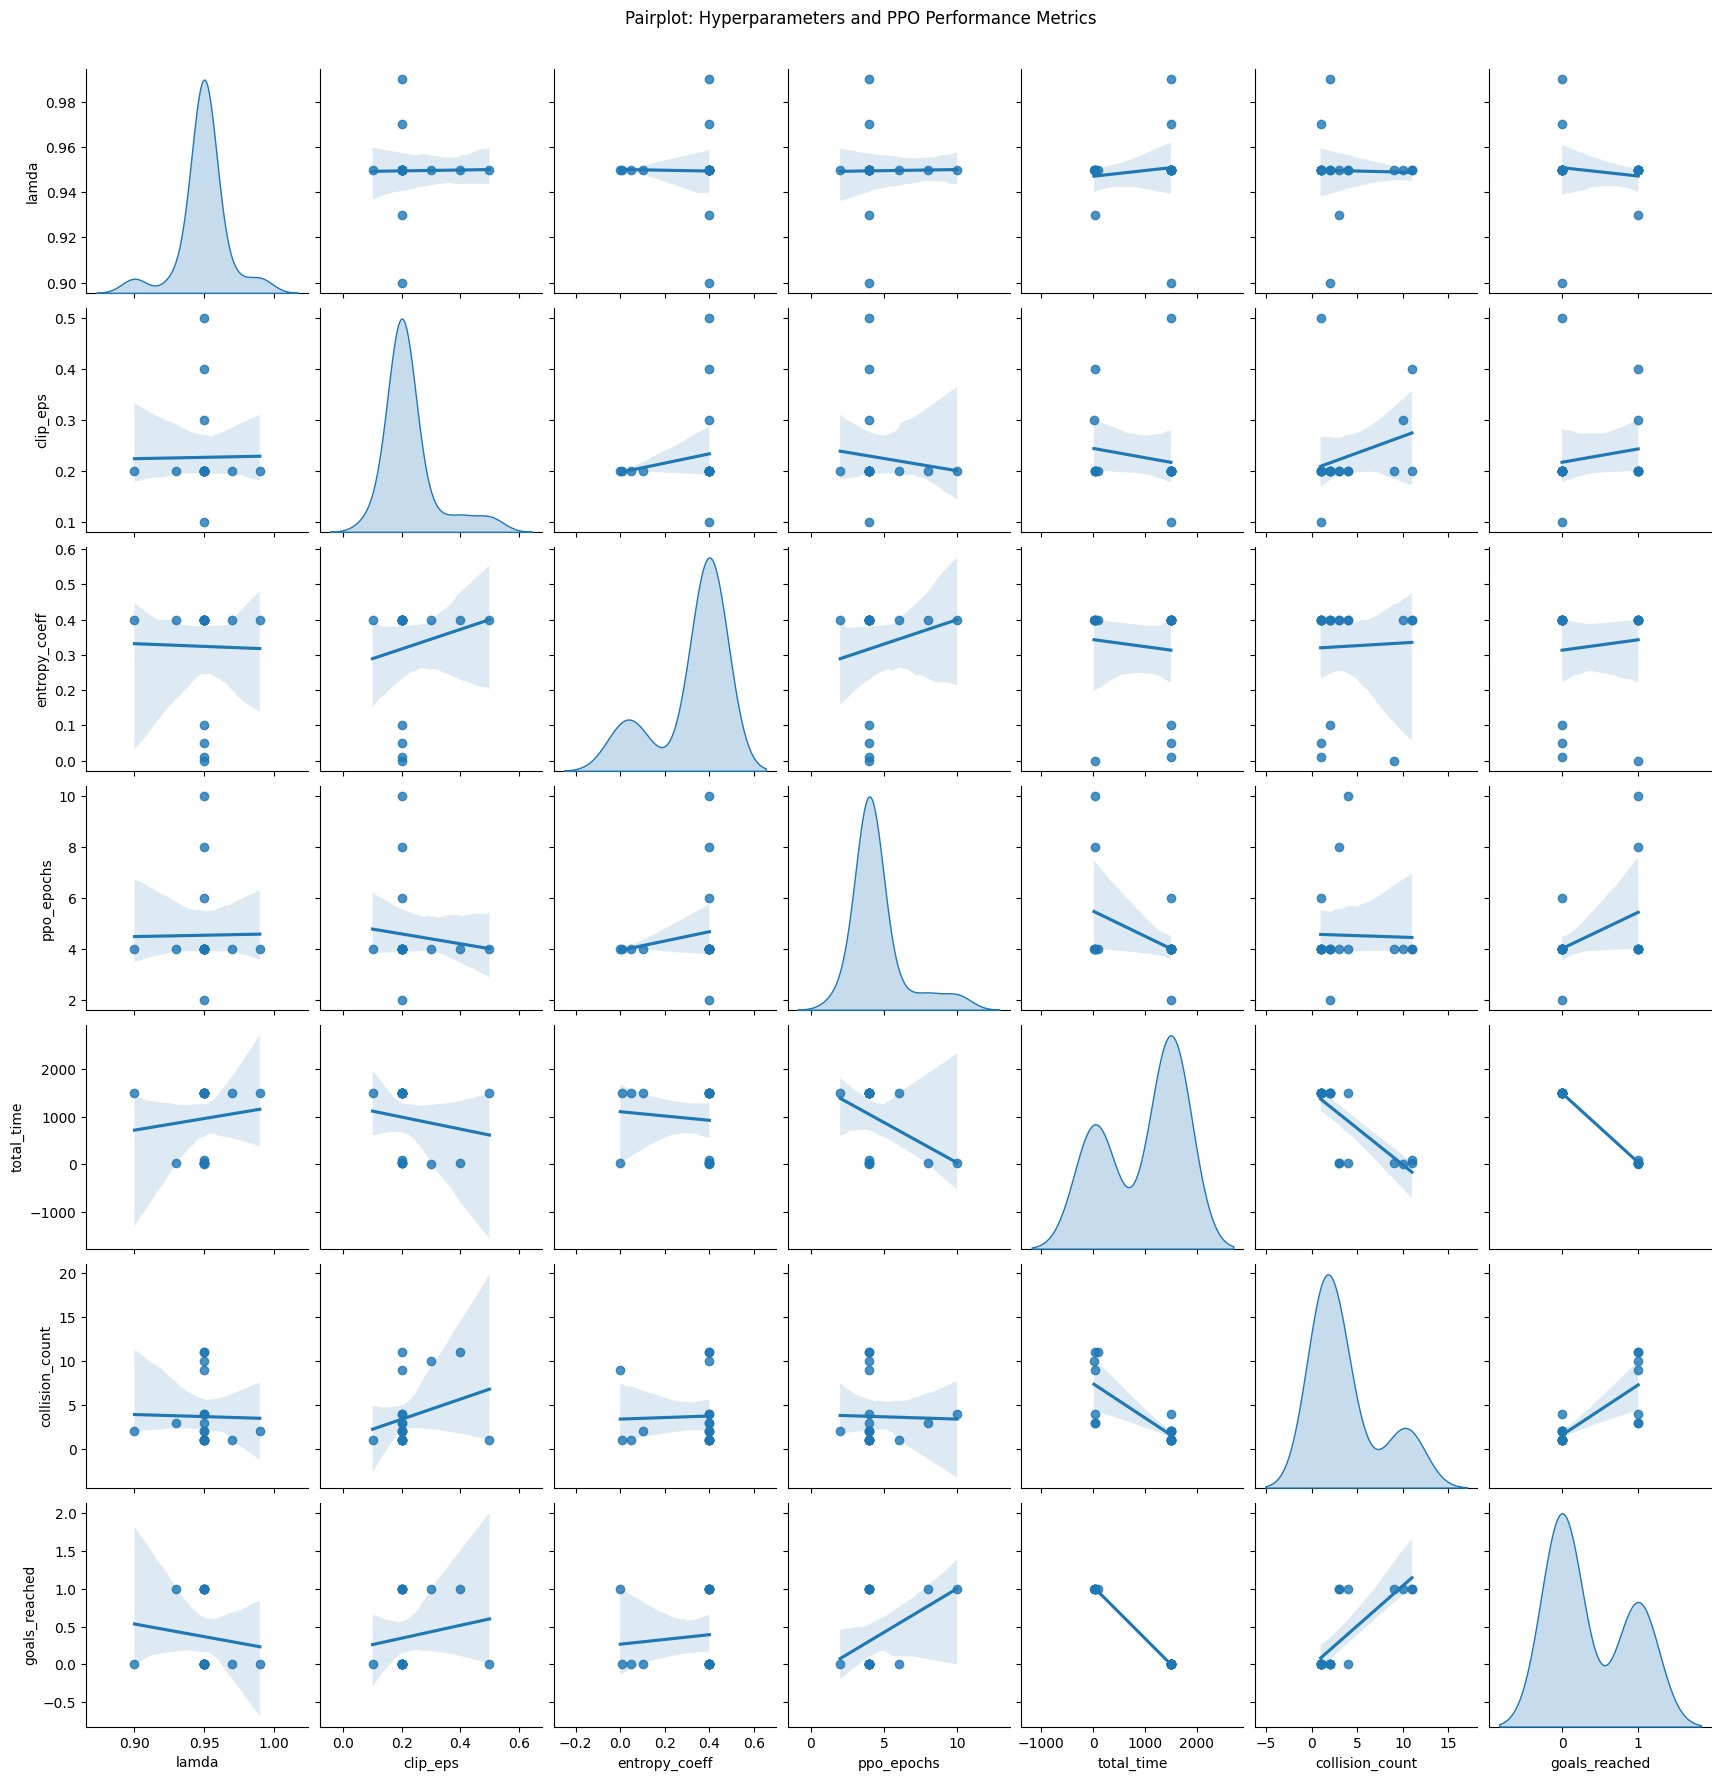

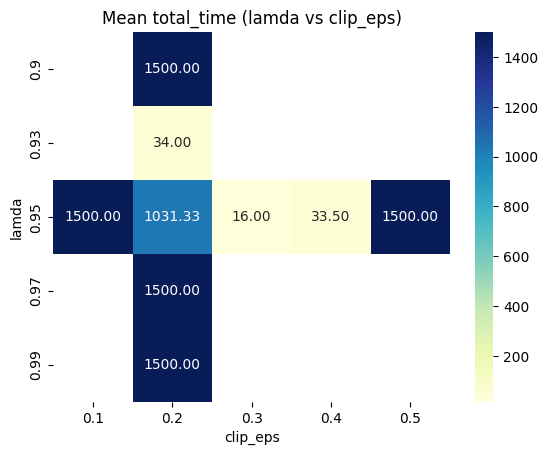

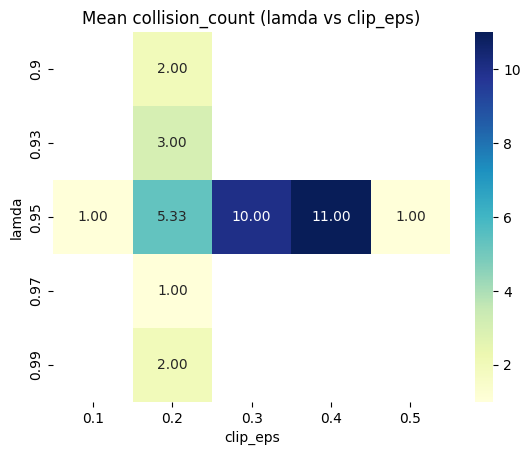

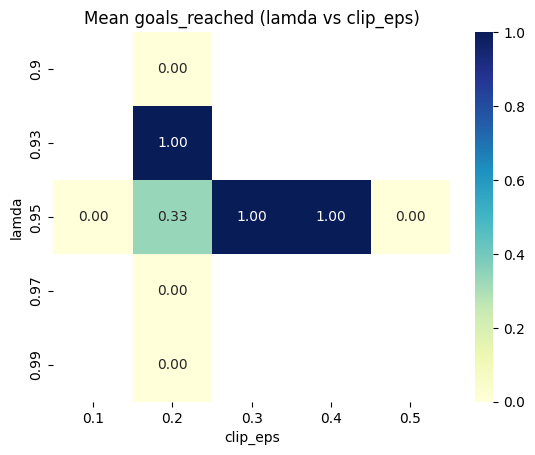

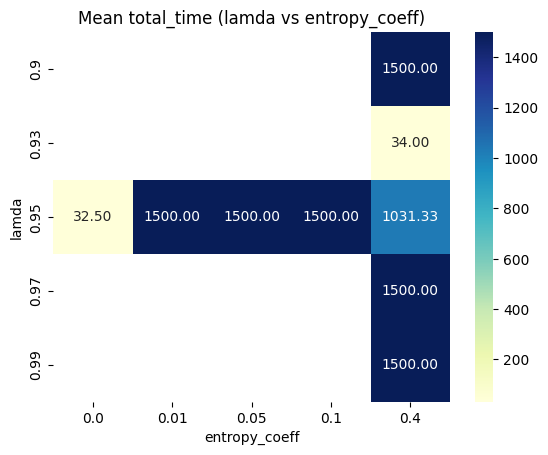

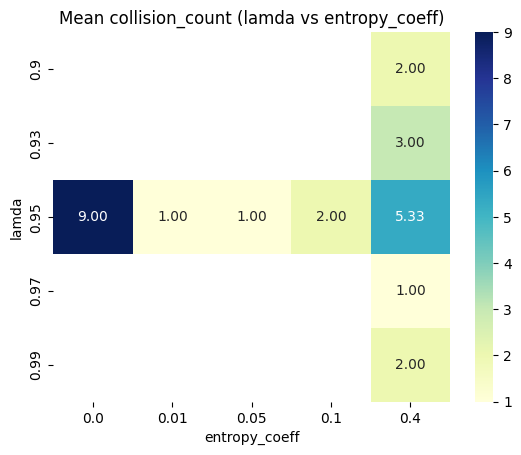

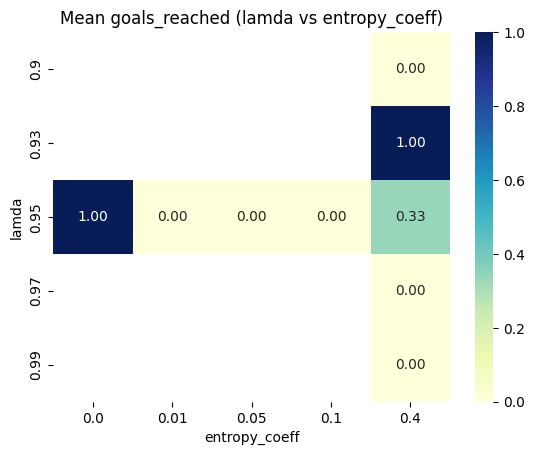

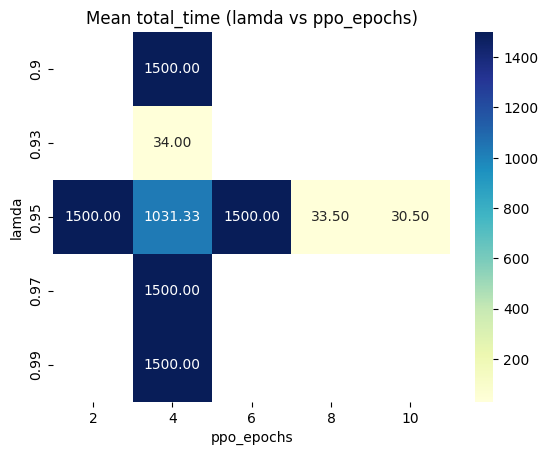

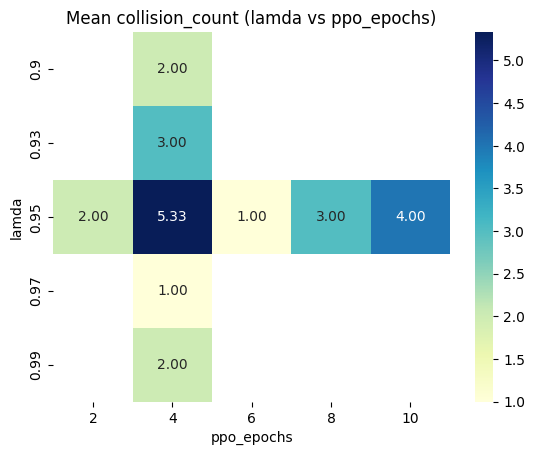

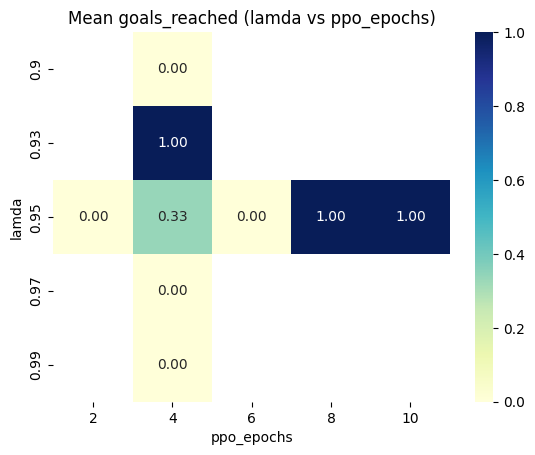

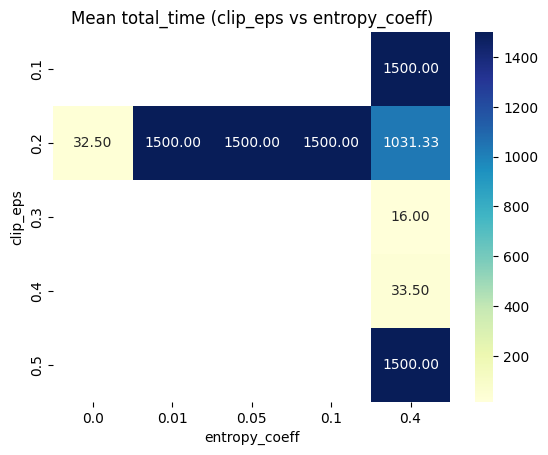

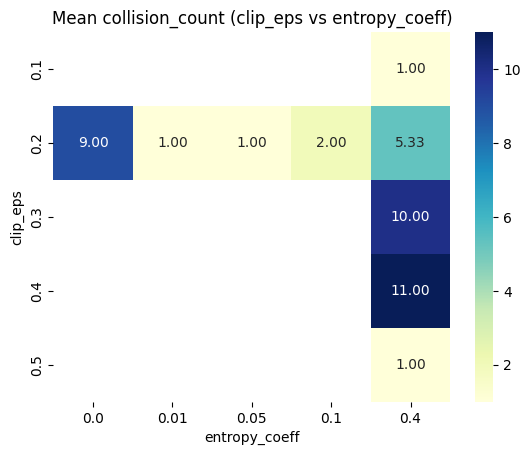

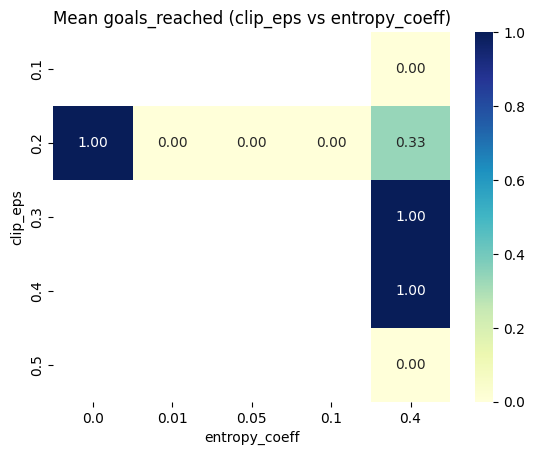

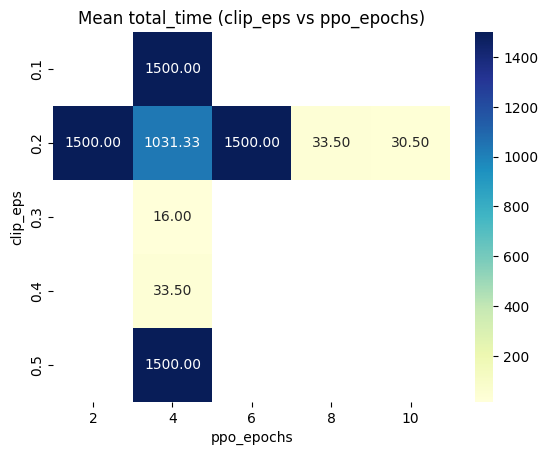

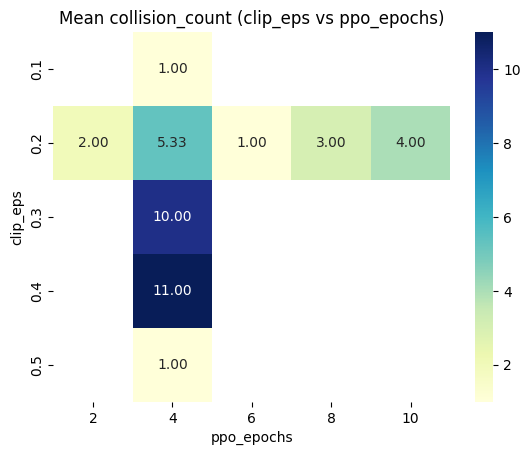

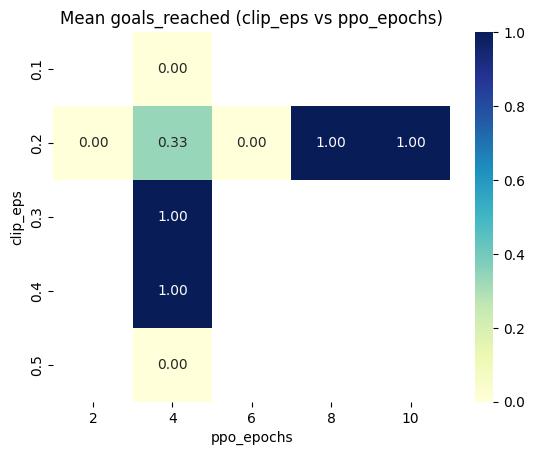

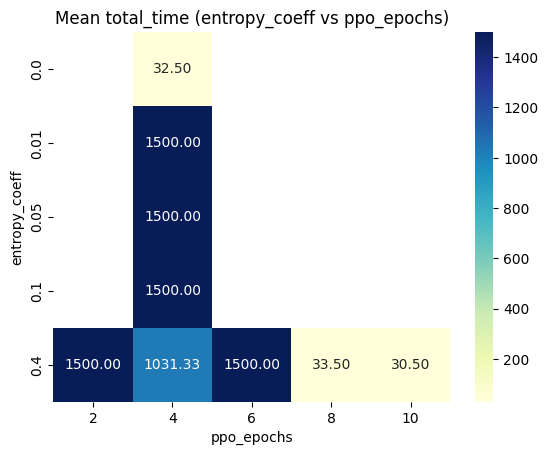

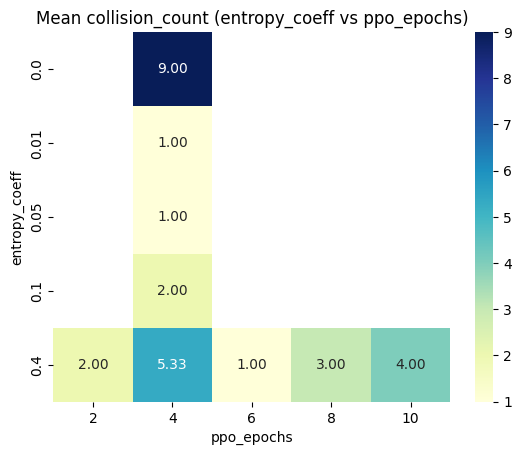

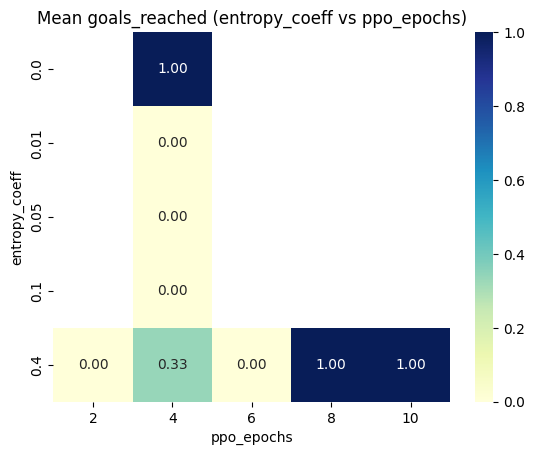

Linear Regression Coefficients (effect on total_time):


lamda             83.056118
clip_eps        -137.764094
entropy_coeff      4.559756
ppo_epochs      -303.224254
dtype: float64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

# 1. Pairplot: Visualizes all pairwise relationships between hyperparams and metrics
cols_to_plot = ['lamda', 'clip_eps', 'entropy_coeff', 'ppo_epochs', 'total_time', 'collision_count', 'goals_reached']
sns.pairplot(part3_df[cols_to_plot], kind='reg', diag_kind='kde')
plt.suptitle("Pairplot: Hyperparameters and PPO Performance Metrics", y=1.02)
plt.show()

# 2. Heatmaps for all pairs of hyperparameters (fixing the others to default)
def plot_heatmap(df, row_param, col_param, metric, fixed_params):
    # Filter only for rows where the other parameters are at default
    filter_cond = np.ones(len(df), dtype=bool)
    for k, v in fixed_params.items():
        if k != row_param and k != col_param:
            filter_cond &= (df[k] == v)
    filtered = df[filter_cond]
    # Pivot table: mean value of the metric for each combination
    table = pd.pivot_table(filtered, index=row_param, columns=col_param, values=metric, aggfunc='mean')
    sns.heatmap(table, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"Mean {metric} ({row_param} vs {col_param})")
    plt.xlabel(col_param)
    plt.ylabel(row_param)
    plt.show()

# Example: Heatmap for lamda vs clip_eps (you can do this for all pairs and metrics)
for row_param, col_param in [('lamda', 'clip_eps'), ('lamda', 'entropy_coeff'), ('lamda', 'ppo_epochs'),
                             ('clip_eps', 'entropy_coeff'), ('clip_eps', 'ppo_epochs'), ('entropy_coeff', 'ppo_epochs')]:
    for metric in ['total_time', 'collision_count', 'goals_reached']:
        plot_heatmap(part3_df, row_param, col_param, metric, default_vals)

# 3. Optional: Multivariate linear regression (effect of all 4 hyperparams on total_time)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Prepare features/target
X = part3_df[['lamda', 'clip_eps', 'entropy_coeff', 'ppo_epochs']]
y = part3_df['total_time']

# Normalize features for interpretability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

reg = LinearRegression()
reg.fit(X_scaled, y)
coefs = pd.Series(reg.coef_, index=X.columns)

print("Linear Regression Coefficients (effect on total_time):")
display(coefs)

# Interpretation: Larger positive values mean increasing the parameter increases total_time (worse), negative means it decreases (better).
